# Histogram

* Histogram
    * Find histograms, using both OpenCV and Numpy functions
    * Plot histograms, using Matplotlib functions
    * Find CDF
    * Histogram Equalization

## OpenCV
* installation
    * `conda install -c conda-forge py-opencv`
    * `pip install opencv-python`


* Official Opencv doumentation
    * https://docs.opencv.org/4.4.0/index.html

Import the OpenCV library. We usually assign it with the name `cv`.

In [1]:
import os
import cv2 as cv # OpenCV
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [16, 9]

# %matplotlib qt
# %matplotlib inline

## Histogram

* Histogram collects **counts of data** organized **within predefined bins**.
    * The collected data can be any feature (*e.g.*, intensity) you find useful to describe your image.


* What is an image histogram?
    * It is a histogram of an image.
    * It quantifies the number of pixels for each intensity value in an intensity range.


The image histogram provides information on the intensity distribution of an image.
It is just another way of understanding an image.
With the histogram of an image, you get an intuition about contrast, brightness, intensity distribution, etc.
Most of image processing tools (like OpenCV), provides useful features for working with histogram.

#### Terminologies
* **bins**: It is the number of subdivisions in each dim. In our example, bins = 256
* **range**: The limits for the values to be measured. In this case: range = [0,255]


#### Histogram Calculation in OpenCV
we use `cv.calcHist()` function to find the histogram.

* `hist = cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])`
    * `images` : List of source image(s) of type uint8 or float32.
    * `channels` : List of index of channel of an source image.
    * `mask` : Mask image. To find histogram of a full image, it should be given as `None`.
    * `histSize` : List of a count of BIN.
    * `ranges` : Range of a bin.

`hist` is a array of size `(histSizex1)` array, in which each value corresponds to number of pixels of intensity with in a bin range.

#### Practice
Let's start with a sample image. Simply load an image in grayscale mode and find its full histogram.

(256, 1)
(256,)


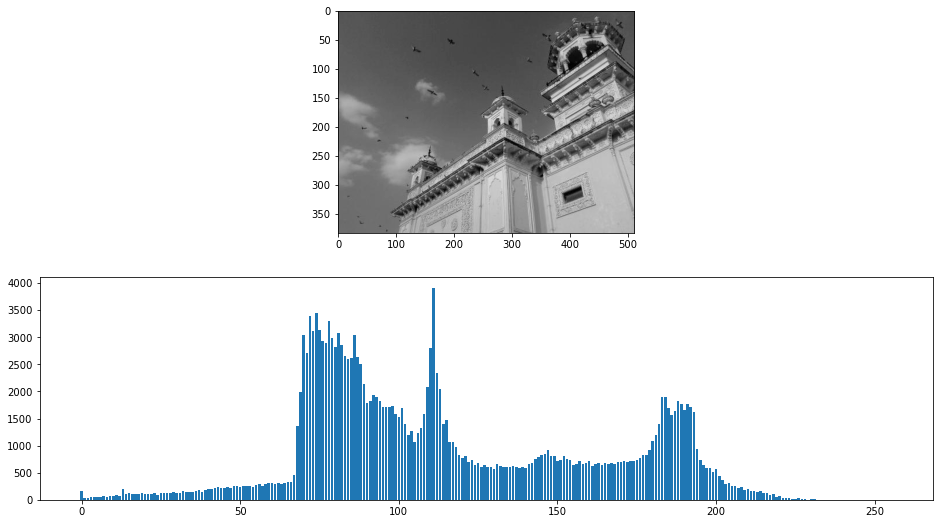

In [2]:
img = cv.imread('resources/home.jpg', cv.IMREAD_GRAYSCALE)

### histogram 구하고 display 하기
## TODO: compute the histogram
hist = cv.calcHist([img], [0], None, [256], [0,256])
print(hist.shape) # (256, 1)
##

## display the histogram using matplotlib
hist = hist[:,0] # change shape. (256)
bins = np.array(list(range(0,256))) # create bins. (256)

print(bins.shape)
plt.subplot(2,1,1), plt.imshow(img, 'gray')
plt.subplot(2,1,2), plt.bar(bins,hist)
plt.show()

#### Masking for local histogram
Apply a mask to an image for computing a **local region** of the image.

In the histogram plot, blue line shows histogram of full image while green line shows histogram of masked region.

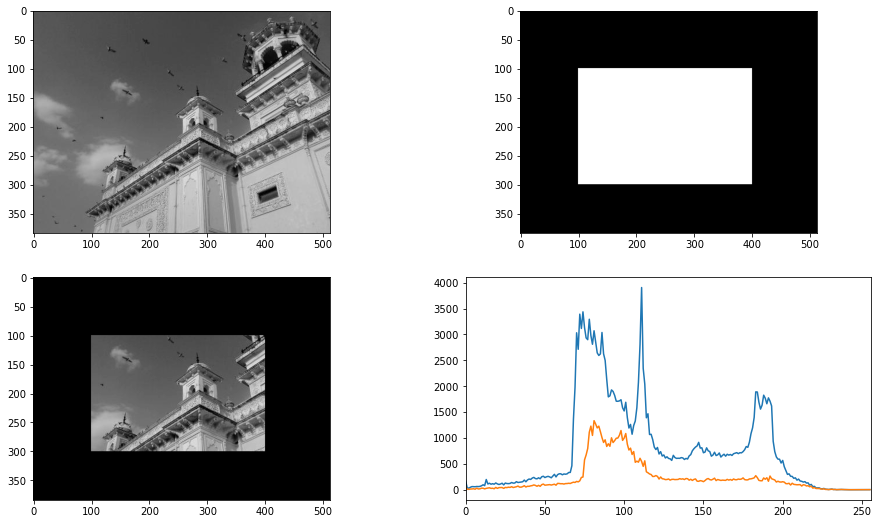

In [3]:
img = cv.imread('resources/home.jpg', cv.IMREAD_GRAYSCALE)

### mask를 사용하여 histogram 구하기
## TODO
# create a mask
mask = np.zeros_like(img)
mask[100:300, 100:400] = 1

# apply the mask to image
masked_img = img * mask

# Calculate histogram with mask and without mask
hist_full = cv.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv.calcHist([img],[0],mask,[256],[0,256])
##

# display histogram
plt.subplot(2,2,1), plt.imshow(img, 'gray')
plt.subplot(2,2,2), plt.imshow(mask,'gray')
plt.subplot(2,2,3), plt.imshow(masked_img, 'gray')
plt.subplot(2,2,4), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

#### Histogram Calculation in Numpy
Numpy also provides a function, `np.histogram()`.

* `numpy.histogram(a, bins=10, range=None, normed=None, weights=None, density=None)`
    * `a`: Input data. The histogram is computed over the flattened array.
    * `bins`: If bins is an int, it defines the number of equal-width bins in the given range (10, by default).
    If bins is a sequence, it defines a monotonically increasing array of bin edges, including the rightmost edge, allowing for non-uniform bin widths.
    * `range`: The lower and upper range of the bins. If not provided, range is simply (a.min(), a.max()).
    * Returns:
        * `hist`: The values of the histogram. See density and weights for a description of the possible semantics.
        * `bin_edges`: Return the bin edges `(length(hist)+1)`.

`hist` is the same as what `cv.calcHist()` returns. But `numpy.histogram` additionally returns edge of bins `bin_edges` which have `(number of bins + 1)` elements.

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

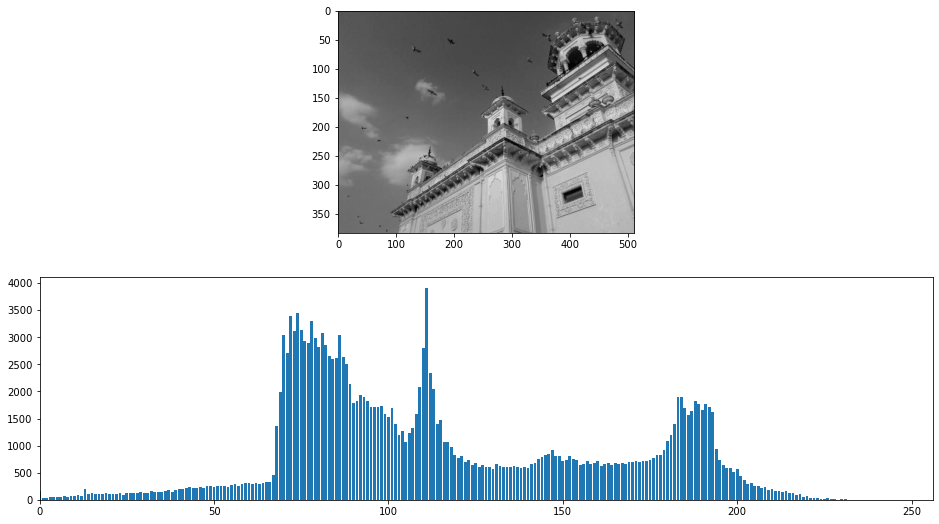

In [4]:
### numpy로 histogram 구하기
##TODO
#compute histogram
hist, bin_edges = np.histogram(img.ravel(),256,[0,256])

print(bin_edges)
print(hist.shape) # (256,)
print(bin_edges.shape) # (257,)

# display histogram using matplotblib
bins = np.array(list(range(0,256))) # (256)
plt.subplot(2,1,1), plt.imshow(img, 'gray')
plt.subplot(2,1,2), plt.bar(bins,hist)
plt.xlim([0,256])
plt.show()


#### Cumulative Density Function (CDF)

You can get histogram from CDF.

* CDF
    * Like histogram, you can get intuition about contrast, brightness, intensity distribution etc of that image by exmining a CDF.
    * CDF can be created by cumulative summing (`np.cumsum()`) from the first to last bin.

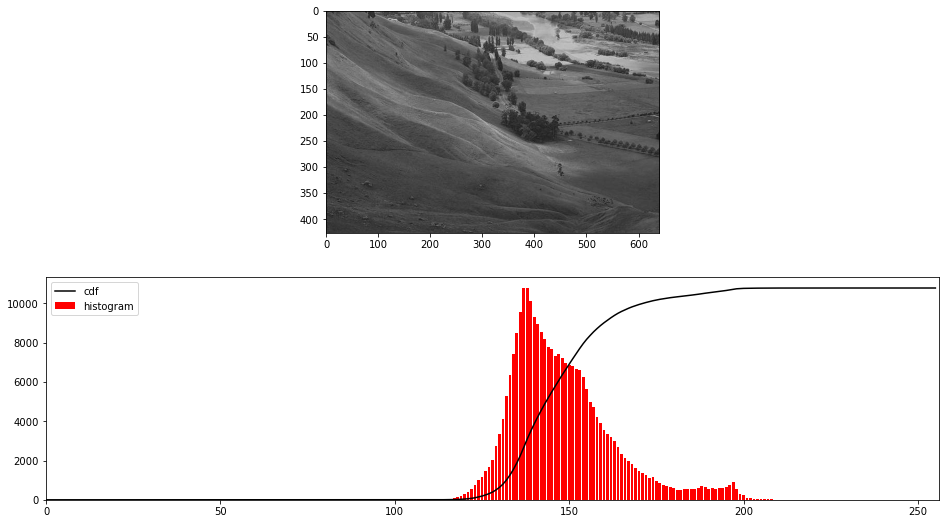

In [5]:
img = cv.imread('resources/wiki.jpg', cv.IMREAD_GRAYSCALE)

### CDF 구하기
## TODO
# compute histogram
hist,bins_edges = np.histogram(img,256,[0,256])

# compute cdf
cdf = np.cumsum(hist)
# cdf, _ = np.histogram(img,256,[0,256], density=True)
##

# display
plt.subplot(2,1,1), plt.imshow(img, 'gray')

cdf_ = cdf * float(hist.max()) / cdf.max() # for visualization
plt.subplot(2,1,2)
plt.plot(cdf_, color = 'black')
plt.bar(bins, hist, color = 'r')

plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

### Histogram Equalization

In this section, we will learn the concepts of histogram equalization and use it to improve the contrast of our images.

Consider an image whose pixel values are confined to some specific range.
For example, a saturated image will have all pixels confined to a range of high values.
But a good image usually has pixel values across full range.

Stretching the histogram of the sturated image to either ends is called Histogram Equalization.

### Histograms Equalization in OpenCV

OpenCV has a function to do the histogram equalization, `cv.equalizeHist()`.
Its input is just grayscale image and output is our histogram equalized image.
`dst= cv.equalizeHist(src[, dst])`

We can take different images with different light conditions, equalize it and check the results.
The Histogram of original image lies around brighter region.
The Histogram of equalized image lies across full range.

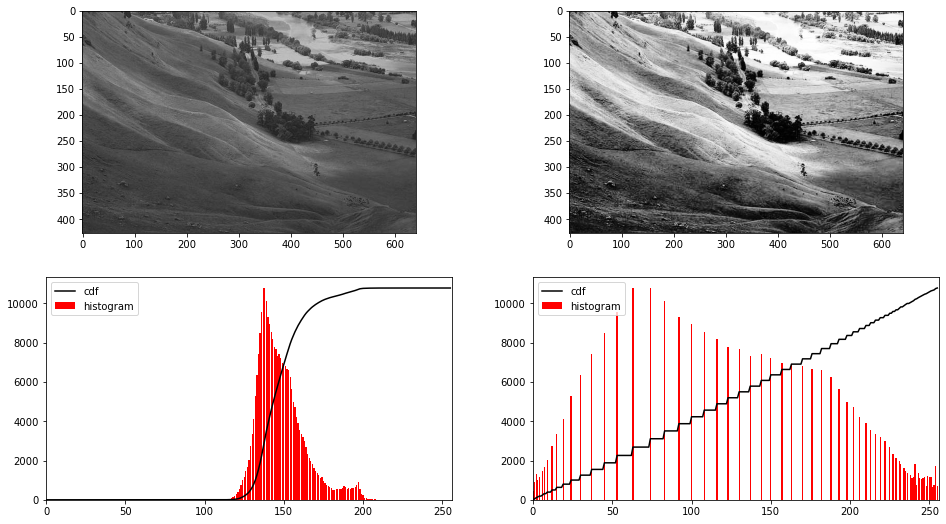

In [6]:
img = cv.imread('resources/wiki.jpg',0)

# Histograms Equalization in OpenCV
# TODO

# histogram equalization
equ = cv.equalizeHist(img)

# display
plt.subplot(2,2,1),plt.imshow(img, 'gray')
plt.subplot(2,2,2),plt.imshow(equ, 'gray')

hist,bins_edges = np.histogram(img,256,[0,256])
cdf = np.cumsum(hist, dtype=hist.dtype)
cdf_ = cdf * float(hist.max()) / cdf.max() # for visualization
plt.subplot(2,2,3), plt.plot(cdf_, color = 'black'), plt.bar(bins, hist, color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')

hist_equalized, bins_edges = np.histogram(equ,256,[0,256])
cdf_equalized = np.cumsum(hist_equalized, dtype=hist.dtype)
cdf_ = cdf_equalized * float(hist_equalized.max()) / cdf_equalized.max() # for visualization
plt.subplot(2,2,4), plt.plot(cdf_, color = 'black'), plt.bar(bins, hist_equalized, color = 'r')

plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

### Histograms Equalization in Numpy
To compute Histograms Equalization, we need a transformation function which maps the input pixels in brighter region to output pixels in full region.

How to compute Histogram Equalization
1. Compute histogram of the image
2. Compute CDF
    * Use `np.cumsum`
3. Normalize CDF
    * Find minimum, maximum of te CDF (excluding zeros)
    * Normalize: `cdf_normalized[i] = (cdf[i] - min)*255.0/(max-min)` (excluding zeros)
4. Change pixel values using normalized CDF
    * Assign new pixel values using numpy (transform pixel value using CDF)

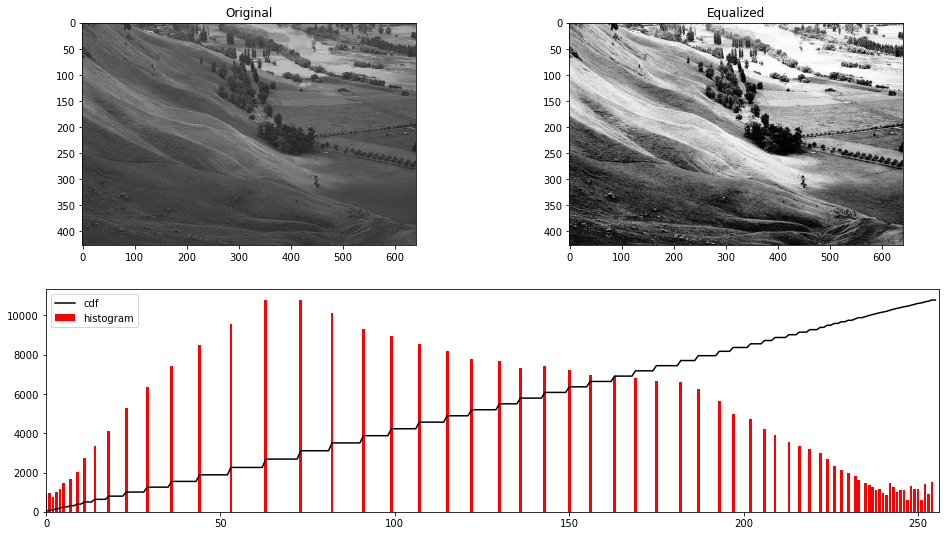

In [7]:
img = cv.imread('resources/wiki.jpg',0)

# Histograms Equalization in Numpy
# TODO

# 1. compute histogram
hist,bins_edges = np.histogram(img,256,[0,256])

# 2. compute cdf
cdf = np.cumsum(hist, dtype=hist.dtype)

# 3. normalize cdf
# find min, max of cdf (excluding zeros)
cdf_nonzero= cdf[np.nonzero(cdf)]
min = np.min(cdf_nonzero)
max = np.max(cdf_nonzero)

# compute normalized cdf
cdf_normalized = (cdf - min)/(max-min) * 255.0
##

# 5. stretch pixel values
img_equ = cdf_normalized[img] # assign values
img_equ =  img_equ.astype(np.uint8) # change dtype

## visualize
plt.subplot(2,2,1),plt.imshow(img, 'gray'), plt.title('Original')
plt.subplot(2,2,2),plt.imshow(img_equ, 'gray'), plt.title('Equalized')

hist_equalized, bins_edges = np.histogram(img_equ,256,[0,256])
cdf_equalized = np.cumsum(hist_equalized, dtype=hist.dtype)
cdf_ = cdf_equalized * float(hist_equalized.max()) / cdf.max() # for visualization
bins = np.array(list(range(0,256))) # (256)
plt.subplot(2,2,(3,4)), plt.plot(cdf_, color = 'black'), plt.bar(bins, hist_equalized, color = 'r')

plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


### CLAHE (Contrast Limited Adaptive Histogram Equalization)
The first histogram equalization we just saw, considers the global contrast of the image.
In many cases, it is not a good idea.
For example, below image shows an input image and its result after global histogram equalization.


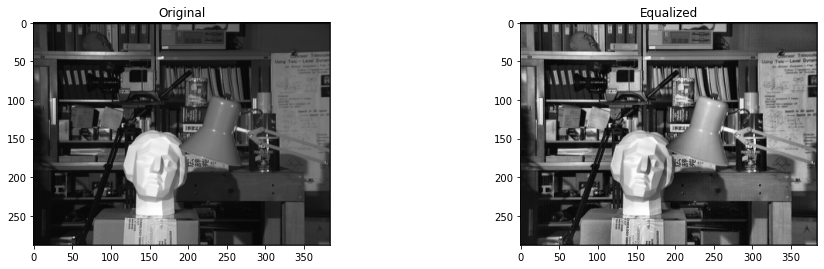

In [8]:
img = cv.imread('resources/tsukuba_l.png',0)

# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

# display
plt.subplot(2,2,1),plt.imshow(img, 'gray'), plt.title('Original')
plt.subplot(2,2,2),plt.imshow(cl1, 'gray'), plt.title('Equalized')
plt.show()

It is true that the background contrast has improved after histogram equalization.
But compare the face of statue in both images.
We lost most of the information there due to over-brightness.
It is because its histogram is not confined to a particular region as we saw in previous cases.

So to solve this problem, adaptive histogram equalization is used.
An image is divided into small blocks called "tiles" (tileSize is 8x8 by default in OpenCV).
Then each of these blocks are histogram equalized as usual.
So in a small area, histogram would confine to a small region (unless there is noise).
If noise is there, it will be amplified.
To avoid this, contrast limiting is applied.
If any histogram bin is above the specified contrast limit (by default 40 in OpenCV),
those pixels are clipped and distributed uniformly to other bins before applying histogram equalization.
After equalization, to remove artifacts in tile borders, bilinear interpolation is applied.

Below code snippet shows how to apply CLAHE in OpenCV:



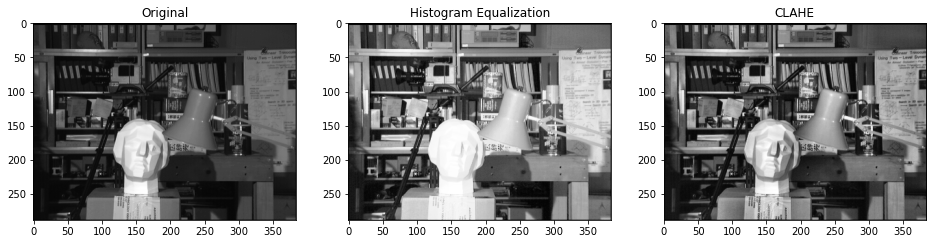

In [9]:
img = cv.imread('resources/tsukuba_l.png',0)

# Histogram Equalization
equ = cv.equalizeHist(img)

# CLAHE
# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

# display
plt.subplot(1,3,1),plt.imshow(img, 'gray'), plt.title('Original')
plt.subplot(1,3,2),plt.imshow(equ, 'gray'), plt.title('Histogram Equalization')
plt.subplot(1,3,3),plt.imshow(cl1, 'gray'), plt.title('CLAHE')
plt.show()